<a href="https://colab.research.google.com/github/androbaza/IP-algos/blob/main/3_Pass_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import time
from imageio import imread
import matplotlib.pyplot as plt

from numpy.fft import fft2, ifft2, fftshift, ifftshift
from scipy.ndimage.filters import convolve
from skimage.transform import resize
from skimage.draw import disk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(256, 256)


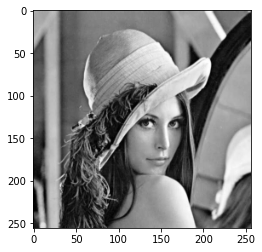

In [5]:
im = imread("/content/drive/MyDrive/samples/lena.jpg", pilmode="L")
im = resize(im, (256, 256), order=1, anti_aliasing=True, mode="reflect") 
im = (im*255).astype(np.uint8)
plt.imshow(im, cmap="gray")
print(im.shape)
plt.show()

# Exercise 4: Filtering in Frequency Domain

The discrete Fourier transform (DFT) represents an image as a sum of sine and cosine waves with different frequencies and amplitudes. It is defined as:

$$
F(u,v) = \sum_{x=0}^{M}\sum_{y=0}^{N}f(x,y) \cdot e^{-2i\pi\cdot\left(\dfrac{u \cdot x}{M} + \dfrac{v \cdot y}{N} \right)} \;.
$$

This equation makes use of [Euler's formula](https://en.wikipedia.org/wiki/Euler%27s_formula) to represent the base function of the transform:

$$
e^{i \cdot x} = \mathrm{cos}(x) + i\cdot \mathrm{sin}(x) \;.
$$

The result is an array of complex numbers $F(u,v)$, each encoding the parameters of a wave with horizontal frequency $u$ and vertical frequency $v$. The absolute value of that number encodes the *amplitude* of that wave and its argument (the angle between the coefficients of the complex number) encodes the *phase* (offset) of the wave.

For a more extensive explanation, please refer to [this page](https://homepages.inf.ed.ac.uk/rbf/HIPR2/fourier.htm).

## Task 3 - Low- / High-Pass filters

1. Implement a function that performs ideal pass filtering (low- and high-pass). Visualize the filter masks of the ideal low- and high-pass filters in both the frequency and the spatial domain!
2. Implement a function that performs gaussian pass filtering (low- and high-pass). Visualize the filter masks of the gaussian low- and high-pass filters in both the frequency and the spatial domain!
3. Compare both functions qualitatively!

In [6]:
def DFT(im, shift=False):
    
    if im.dtype == np.uint8:
        im = im.astype(np.float) / 255
    
    I = fft2(im) # TODO: perform descrete FFT
    
    if shift:
        I = fftshift(I)
        # TODO: shift spectrum
        pass
    
    return I

def iDFT(I, shift=False, norm=False):
    
    if shift:
        I = ifftshift(I)
        # TODO: shift spectrum if wanted
        pass
    
    im = ifft2(I) # TODO: perform descrete inverse FFT
    
    if norm:
        im = (im.astype(np.float32) - im.min()) / (im.max() - im.min())
    
    return im

In [76]:
def gauss_filter(size, sigma=15):
    """ Creates gaussian kernel with a given size and sigma. """
    ax = np.arange(np.ceil(-size / 2), np.ceil(size / 2))
    xx, yy = np.meshgrid(ax, ax)

    kernel = np.exp(-(xx**2 + yy**2) / (2. * sigma**2))

    return kernel / kernel.sum()


def pass_filter(im, radius_ratio, ideal=True, is_high_pass=True):
    
    I = DFT(im, shift=True)
    radius = int(min(im.shape) * radius_ratio)

    if ideal:
        pass_mask = np.zeros(shape=im.shape)
        rr, cc = disk((pass_mask.shape[0]//2-1, pass_mask.shape[1]//2-1), radius=radius)
        pass_mask[rr, cc] = 1 # TODO: set the mask values for ideal pass filter
    else:
        pass_mask = np.pad(gauss_filter(radius), im.shape[0]//2-radius//2, 'constant', constant_values=0) # TODO: compute gaussian kernel for gaussian pass filter
        
    if is_high_pass:
        pass_mask = 1 - pass_mask
        # plt.imshow(pass_mask)

    return np.abs(  iDFT(I * (pass_mask).astype, shift=True, norm=True)), pass_mask

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: ComplexWarning: Casting complex values to real discards the imaginary part


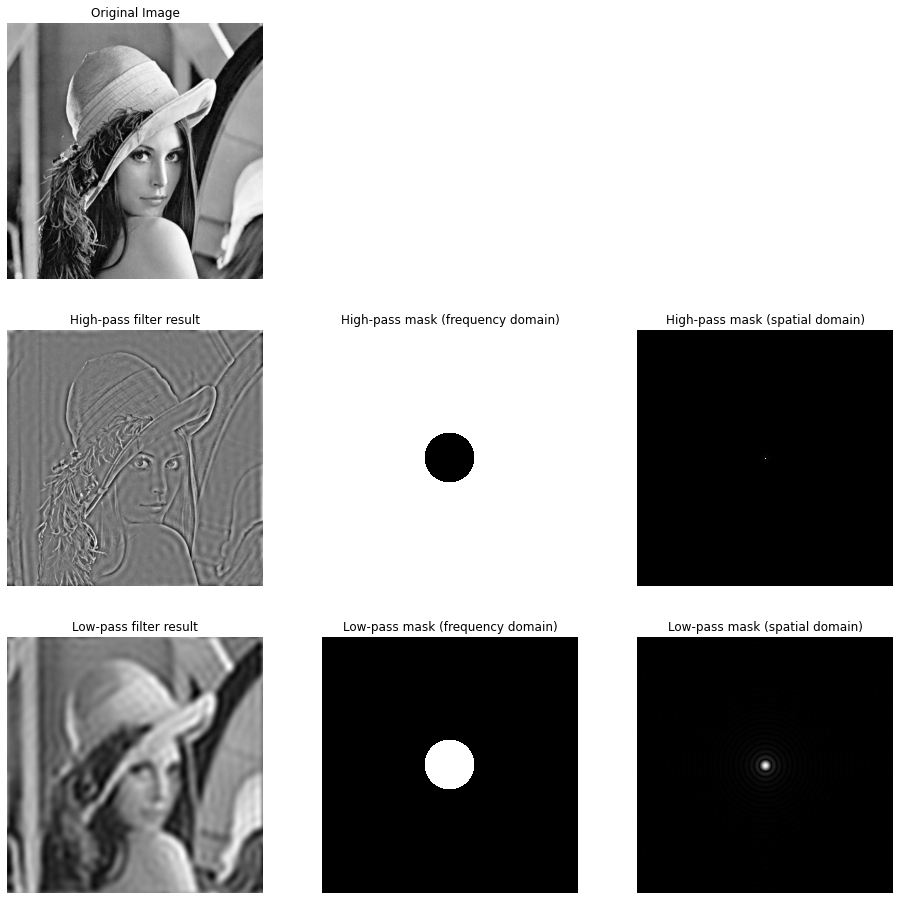

In [47]:
_im = im.copy()

R = 0.1
im0, mask0 = pass_filter(_im, R, is_high_pass=True)
im1, mask1 = pass_filter(_im, R, is_high_pass=False)

sp_mask0 = np.abs(DFT(mask0, shift=True)) # TODO: convert masks from frequency domains to spatial domains
sp_mask1 = np.abs(DFT(mask1, shift=True)) # TODO: convert masks from frequency domains to spatial domains

fig, axs = plt.subplots(3,3, figsize=(16, 16))
for ax in axs.ravel():
    ax.axis('off')

axs[0,0].imshow(_im, cmap=plt.cm.gray)
axs[0,0].set_title("Original Image")

axs[1,0].imshow(im0, cmap=plt.cm.gray)
axs[1,0].set_title("High-pass filter result")

axs[1,1].imshow(np.abs(mask0), cmap=plt.cm.gray)
axs[1,1].set_title("High-pass mask (frequency domain)")

axs[1,2].imshow(np.abs(sp_mask0), cmap=plt.cm.gray)
axs[1,2].set_title("High-pass mask (spatial domain)")

axs[2,0].imshow(im1, cmap=plt.cm.gray)
axs[2,0].set_title("Low-pass filter result")

axs[2,1].imshow(np.abs(mask1), cmap=plt.cm.gray)
axs[2,1].set_title("Low-pass mask (frequency domain)")

axs[2,2].imshow(sp_mask1, cmap=plt.cm.gray)
axs[2,2].set_title("Low-pass mask (spatial domain)")

plt.show()
plt.close()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: ComplexWarning: Casting complex values to real discards the imaginary part


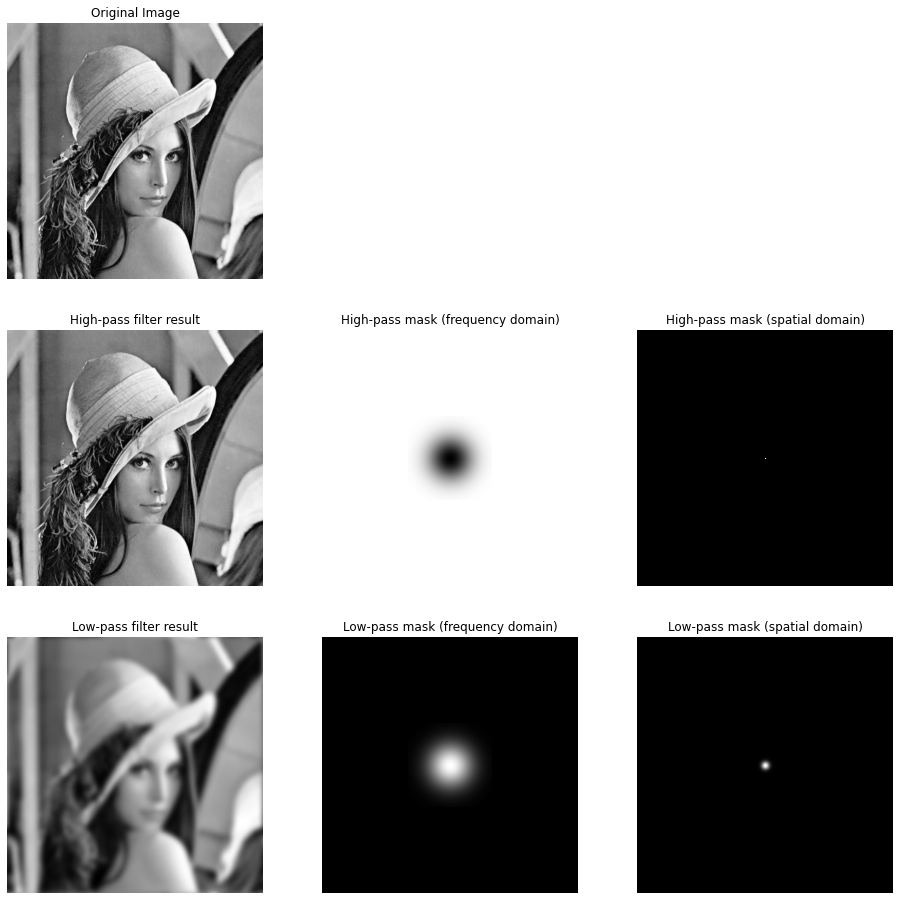

In [74]:
_im = im.copy()

R = 0.33
im0, mask0 = pass_filter(_im, R, ideal=False, is_high_pass=True)
im1, mask1 = pass_filter(_im, R, ideal=False, is_high_pass=False)

sp_mask0 = np.abs(DFT(mask0, shift=True)) # TODO: convert masks from frequency domains to spatial domains
sp_mask1 = np.abs(DFT(mask1, shift=True)) # TODO: convert masks from frequency domains to spatial domains

fig, axs = plt.subplots(3,3, figsize=(16, 16))
for ax in axs.ravel():
    ax.axis('off')

axs[0,0].imshow(_im, cmap=plt.cm.gray)
axs[0,0].set_title("Original Image")

axs[1,0].imshow(im0, cmap=plt.cm.gray)
axs[1,0].set_title("High-pass filter result")

axs[1,1].imshow(mask0, cmap=plt.cm.gray)
axs[1,1].set_title("High-pass mask (frequency domain)")

axs[1,2].imshow(sp_mask0, cmap=plt.cm.gray)
axs[1,2].set_title("High-pass mask (spatial domain)")

axs[2,0].imshow(im1, cmap=plt.cm.gray)
axs[2,0].set_title("Low-pass filter result")

axs[2,1].imshow(mask1, cmap=plt.cm.gray)
axs[2,1].set_title("Low-pass mask (frequency domain)")

axs[2,2].imshow(sp_mask1, cmap=plt.cm.gray)
axs[2,2].set_title("Low-pass mask (spatial domain)")

plt.show()
plt.close()

the gaussian low pass filter shows much smoother filtering, while the high pass filtering is not functional with gaussian kernel.